In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import numpy as np # scientific computing
import pandas as pd # data loading and processing
import os # os operations
import matplotlib.pyplot as plt # for generating figures
import math
import matplotlib.dates as mdates
import seaborn as sns # for generating visualizations, better support with pandas than matplotlib
from scipy import stats
from sklearn.impute import SimpleImputer

from analysis_publication import *
from venn import pseudovenn, generate_petal_labels, draw_venn, generate_colors, draw_pseudovenn6

In [4]:
df = pd.read_csv('r values p53sig-genes-selected.csv', index_col=1)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df

,CAT,PRDX1,PRDX6,GPX2,GSR,SLC6A9,TXN,SRXN1,G6PD,IDH1,...,UGT1A6,GSTA1,GSTA2,GSTA3,GSTA4,GSTA5,GSTM1,GSTM2,GSTM3,GSTP1
database,,,,,,,,,,,,,,,,,,,,,
HNSC,0.199046,-0.239788,-0.017760,-0.181833,0.065364,-0.128331,-0.157645,-0.210389,-0.245019,0.047970,...,-0.001522,0.021558,0.034978,-0.217016,-0.102897,0.088782,0.044328,0.032438,-0.071543,-0.266709
SARC,0.230599,-0.187451,-0.176684,-0.080635,-0.095735,-0.258033,-0.220671,-0.036181,-0.155464,0.140472,...,-0.073514,-0.063612,-0.154293,-0.061521,0.176401,-0.028460,-0.047006,0.071204,0.082017,0.068728
LUSC,0.325807,-0.268800,-0.210242,-0.186058,-0.174510,-0.072247,-0.289057,-0.263884,-0.305549,-0.176169,...,-0.050772,0.008369,0.068897,0.212821,-0.072304,0.103128,-0.043951,-0.090511,-0.080818,-0.134067
UCS,0.117524,-0.174957,0.034074,-0.086766,0.267157,-0.001209,-0.096354,0.087508,-0.292821,-0.013418,...,-0.237145,-0.034562,0.046990,0.449116,0.136996,0.442896,-0.025969,-0.090352,-0.094851,-0.404981
STAD,0.121643,-0.020809,-0.038993,0.016397,0.192902,-0.094918,-0.028139,-0.046903,-0.179946,-0.005774,...,-0.004716,-0.100432,-0.107462,0.028836,-0.292451,0.012134,-0.033949,-0.096477,-0.117010,-0.192558
LAML,0.083699,0.129016,-0.145771,-0.154677,0.112072,-0.120669,0.021675,0.074454,0.244907,0.229310,...,-0.004199,-0.041492,-0.021840,0.139317,NaN,NaN,NaN,NaN,NaN,NaN
PRAD,0.158908,0.040377,-0.036320,0.272628,0.154359,0.096666,-0.188338,-0.144006,-0.024680,0.055741,...,0.146082,0.290915,0.233830,0.167142,0.434924,0.112248,-0.000960,0.224949,0.262286,0.325694
PAAD,0.139575,-0.011449,0.168827,0.074717,0.011720,-0.105444,-0.105501,-0.066092,-0.005810,-0.044940,...,0.055905,0.059533,0.116780,0.105376,0.059404,-0.098868,-0.031068,0.013796,0.054543,0.075500
BRCA,0.112361,-0.205572,-0.234194,0.183488,0.071660,-0.161013,-0.245993,-0.007722,-0.090002,-0.087334,...,-0.027061,-0.040680,-0.178245,0.148492,-0.098745,-0.202244,0.097599,0.222718,0.185973,-0.158449


In [6]:
# process the dataframe df to extract out sets where the r values are less than -0.1

dataset_dict = {}
data_key = ['HNSC', 'SARC', 'LUSC', 'UCS', 'STAD', 'LAML']
for r in data_key:
    print(r)
    row_data = df.loc[r]
    # print(row_data)
    d = set(df.loc[r,df.loc[r] < -0.1].index.to_list())
    dataset_dict[r] = d

HNSC
SARC
LUSC
UCS
STAD
LAML


In [7]:
petal_labels = generate_petal_labels(dataset_dict.values(), fmt="{size}")

In [8]:
significance_filter = lambda value: value if int(value) > 0 else " "

petal_labels = {
    logic: significance_filter(value)
    for logic, value in petal_labels.items()
}

In [93]:
# petal_labels['111111'] = 'G6PD \n PGD \n TXN'


In [9]:
petal_labels['111110'] = 'G6PD'

<AxesSubplot:>

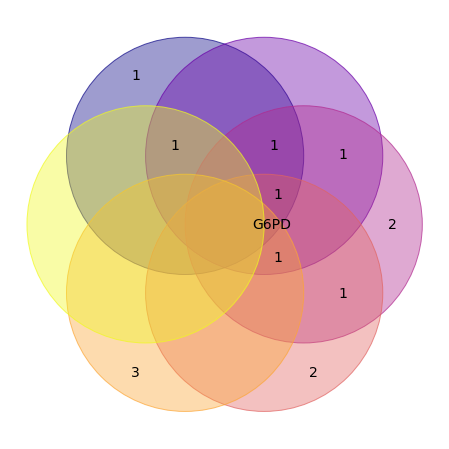

In [10]:
draw_pseudovenn6(
    petal_labels=petal_labels, dataset_labels=dataset_dict.keys(),
    hint_hidden=False, colors=generate_colors(cmap = 'plasma', n_colors=6), 
    figsize=(8, 8), fontsize=14, legend_loc=None, ax=None
)


<AxesSubplot:>

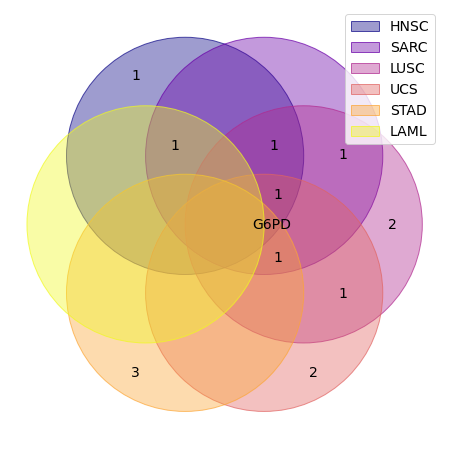

In [11]:
draw_pseudovenn6(
    petal_labels=petal_labels, dataset_labels=dataset_dict.keys(),
    hint_hidden=False, colors=generate_colors(cmap = 'plasma', n_colors=6), 
    figsize=(8, 8), fontsize=14, legend_loc='best', ax=None
)
